In [14]:
import pandas as pd

In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.preprocessing import LabelEncoder


In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
from sklearn.ensemble import RandomForestRegressor


In [20]:
from sklearn.neighbors import KNeighborsRegressor


In [21]:
from sklearn.svm import SVR


In [22]:
from sklearn.tree import DecisionTreeRegressor


In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
from sklearn.model_selection import train_test_split


In [25]:
from sklearn.metrics import r2_score


In [26]:
df=pd.read_csv("/content/Housing.csv")


In [27]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [83]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [84]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


In [28]:
df.shape

(545, 13)

In [29]:
df.size

7085

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [32]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


<Axes: xlabel='bedrooms', ylabel='price'>

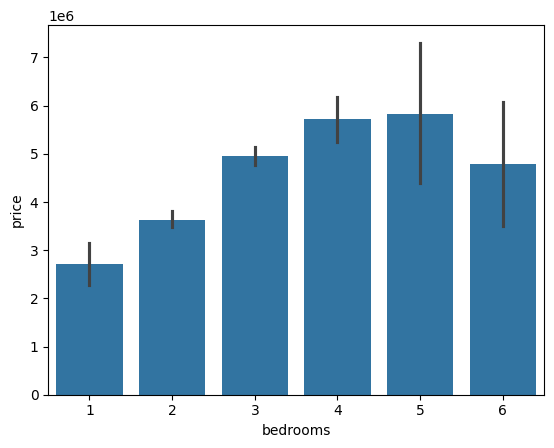

In [33]:
sns.barplot(data=df,x='bedrooms',y='price')

<Axes: xlabel='bathrooms', ylabel='price'>

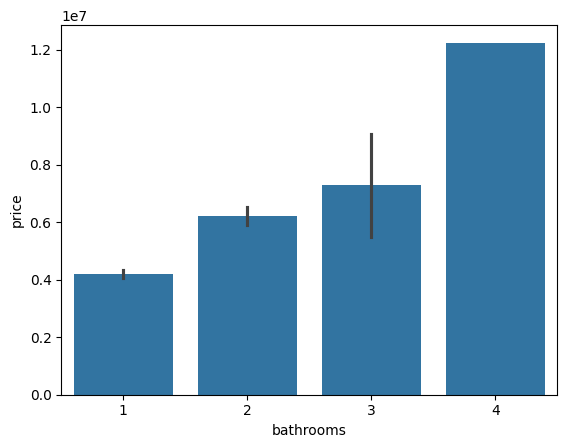

In [34]:
sns.barplot(data=df,x='bathrooms',y='price')

<Axes: xlabel='area', ylabel='price'>

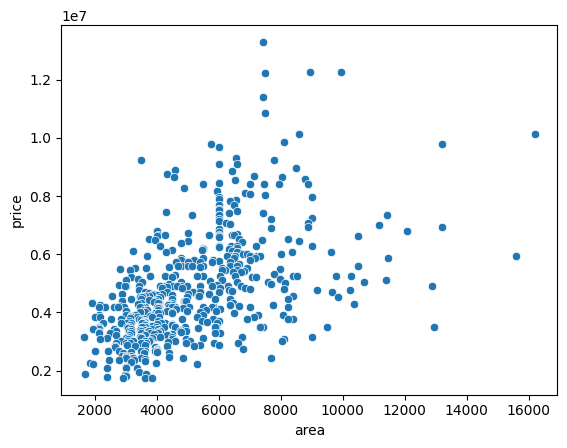

In [35]:
sns.scatterplot(data=df,x='area',y='price')

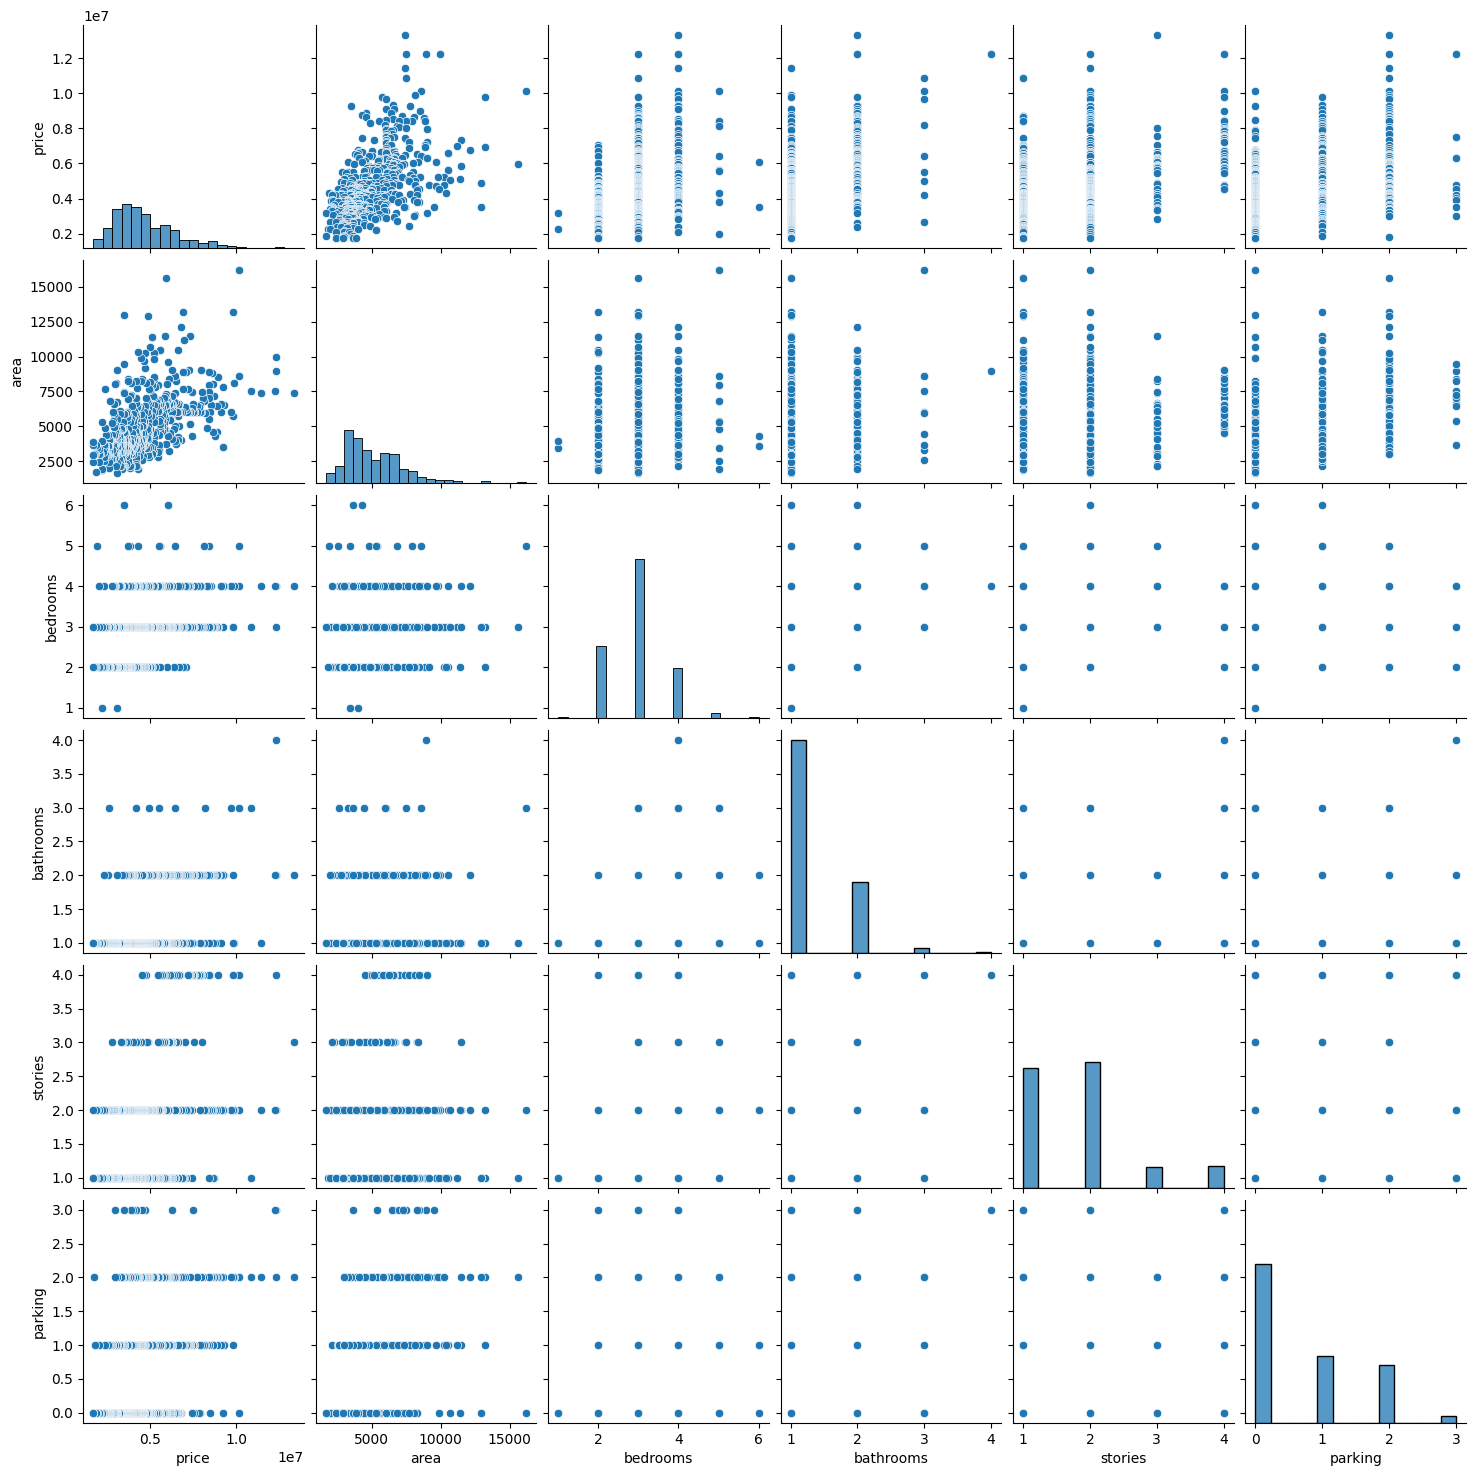

In [36]:
sns.pairplot(df)

In [37]:
label_df=df.groupby('furnishingstatus')['price'].mean().index


In [38]:
value_df=df.groupby('furnishingstatus')['price'].mean().values

([<matplotlib.patches.Wedge at 0x78b875e71710>,
 [Text(0.4010972789841604, 1.0242660654300242, 'furnished'),
  Text(-1.0431475576367422, -0.3490604145366526, 'semi-furnished'),
  Text(0.7053949686453456, -0.8440485401976785, 'unfurnished')],
 [Text(0.2187803339913602, 0.5586905811436496, '38.12%'),
  Text(-0.5689895768927684, -0.19039658974726503, '34.04%'),
  Text(0.38476089198837027, -0.4603901128350973, '27.84%')])

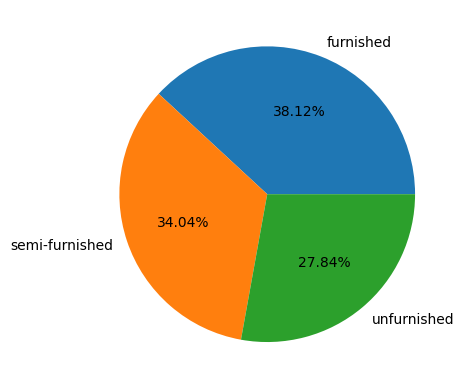

In [39]:
plt.pie(labels=label_df,x=value_df,autopct="%1.2f%%")

In [40]:
numeric_corr = df.corr(numeric_only=True)


In [41]:
numeric_corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

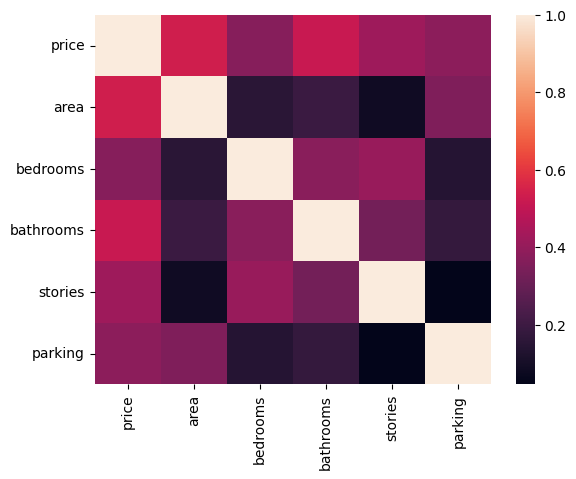

In [42]:
sns.heatmap(numeric_corr)

In [43]:
le=LabelEncoder()


In [44]:
df['mainroad']=le.fit_transform(df['mainroad'])


In [45]:
df['guestroom']=le.fit_transform(df['guestroom'])


In [46]:
df['basement']=le.fit_transform(df['basement'])


In [47]:
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])


In [48]:
df['airconditioning']=le.fit_transform(df['airconditioning'])

In [49]:
df['prefarea']=le.fit_transform(df['prefarea'])

In [50]:
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

In [51]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [52]:
X=df.drop('price',axis=1)

In [53]:
y=df['price']

In [54]:
sc=StandardScaler()


In [55]:
X=sc.fit_transform(X)


In [56]:
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113, -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469, -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113, -0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.22296203]])

In [57]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [59]:
X_test.shape

(180, 12)

In [60]:
X_train.shape

(365, 12)

In [61]:
y_train.shape

(365,)

In [62]:
y_test.shape

(180,)

In [63]:
lr=LinearRegression()


In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred=lr.predict(X_test)

In [66]:
r2_score(y_test,y_pred)#this is best as comapre to other

0.6557070707485257

In [67]:
rfr=RandomForestRegressor()


In [68]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred=rfr.predict(X_test)


In [70]:
r2_score(y_test,y_pred)

0.6000901751774788

In [71]:
knr=KNeighborsRegressor()


In [72]:
knr.fit(X_train,y_train)


KNeighborsRegressor()

In [73]:
y_pred=knr.predict(X_test)


In [74]:
r2_score(y_test,y_pred)

0.6156412349527685

In [75]:
svr=SVR()


In [76]:
svr.fit(X_train,y_train)

SVR()

In [77]:
y_pred=svr.predict(X_test)


In [78]:
r2_score(y_test,y_pred) #we will not use this because r2 score is negative

-0.06054658711622052

In [79]:
dtr=DecisionTreeRegressor()


In [80]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [81]:
y_pred=dtr.predict(X_test)


In [82]:
r2_score(y_test,y_pred) #we will not use this because r2score is very less

0.2754261796314541